In [2]:
import os
from pathlib import Path

if "PROJECT_ROOT" not in globals():
    PROJECT_ROOT = Path.cwd().parent.resolve()

os.chdir(PROJECT_ROOT)

In [3]:
from matplotlib import pyplot as plt
from matplotlib.transforms import ScaledTranslation
import pandas as pd
import utils
from utils import ModelForAnalysis

plt.style.use("ggplot")
plt.style.use("my.mplstyle")

In [4]:
NUM_SHOTS_OF_INTEREST = [1,2,5,10,20,50,100,200]
LARGELY_SAMPLED_EPITOPES = pd.read_csv("analysis_results/CDR3 Levenshtein/ovr_nn_200_shot.csv").epitope.unique()

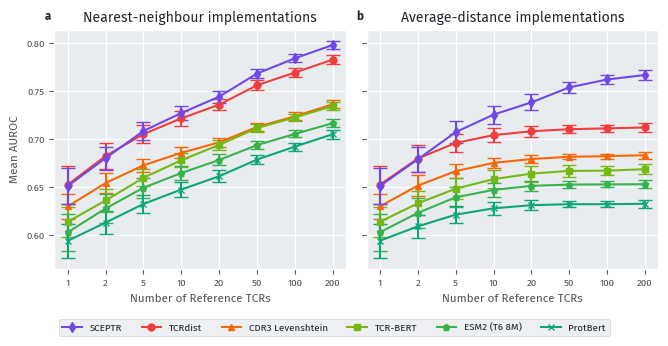

In [5]:
fig, axs = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(17/2.54,8/2.54))

utils.plot_performance_curves(
    (
        ModelForAnalysis("SCEPTR", "ovr_nn", "#7048e8", "d", zorder=2),
        ModelForAnalysis("TCRdist", "ovr_nn", "#f03e3e", "o", zorder=1.9),
        ModelForAnalysis("CDR3 Levenshtein", "ovr_nn", "#f76707", "^"),
        ModelForAnalysis("TCR-BERT", "ovr_nn", "#74b816", "s"),
        ModelForAnalysis("ESM2 (T6 8M)", "ovr_nn", "#37b24d", "p"),
        ModelForAnalysis("ProtBert", "ovr_nn", "#0ca678", "x"),
    ),
    NUM_SHOTS_OF_INTEREST,
    LARGELY_SAMPLED_EPITOPES,
    axs[0]
)

utils.plot_performance_curves(
    (
        ModelForAnalysis("SCEPTR", "ovr_avg_dist", "#7048e8", "d", zorder=2),
        ModelForAnalysis("TCRdist", "ovr_avg_dist", "#f03e3e", "o", zorder=1.9),
        ModelForAnalysis("CDR3 Levenshtein", "ovr_avg_dist", "#f76707", "^"),
        ModelForAnalysis("TCR-BERT", "ovr_avg_dist", "#74b816", "s"),
        ModelForAnalysis("ESM2 (T6 8M)", "ovr_avg_dist", "#37b24d", "p"),
        ModelForAnalysis("ProtBert", "ovr_avg_dist", "#0ca678", "x"),
    ),
    NUM_SHOTS_OF_INTEREST,
    LARGELY_SAMPLED_EPITOPES,
    axs[1]
)

handles, labels = axs[0].get_legend_handles_labels()
new_handles = [
    plt.Line2D(
        [0], [0],
        color=handle[0].get_color(),
        lw=handle[0].get_linewidth(),
        linestyle=handle[0].get_linestyle(),
        marker=handle[0].get_marker(),
        markersize=handle[0].get_markersize()
    )
    for handle in handles
]
axs[1].set_ylabel("")

axs[0].set_title("Nearest-neighbour implementations")
axs[1].set_title("Average-distance implementations")

for ax, label in zip(axs, ("a", "b")):
    trans = ScaledTranslation(-10/100, 0.2, fig.dpi_scale_trans)
    ax.text(0.0, 1.0, label, transform=ax.transAxes + trans, fontsize='large', fontweight="bold", va='top')

fig.legend(new_handles,labels,loc="upper center", bbox_to_anchor=(0,-0.5,1,0.5), ncols=6)
fig.tight_layout()
# fig.savefig("nn_vs_avg_dist.pdf", bbox_inches="tight")